# Step 1: Import Libraries/Dataset

---

a.	Download the dataset.
b.	Import the required libraries and packages.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Load the Dataset
from google.colab import files
uploaded = files.upload()

df = pd.read_csv(list(uploaded.keys())[0])
df.head()


Saving Admission_data.csv to Admission_data (1).csv


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


# Step 2: Data Visualization and Exploration

---
#####a.	Print 5 rows for sanity check to identify all the features present in the dataset and if the target matches with them.
#####b.	Provide appropriate data visualizations to get an insight about the dataset.
#####c.	Do the correlational analysis on the dataset. Provide a visualization for the same. Will this correlational analysis have effect on feature selection that you will perform in the next step? Justify your answer.



In [ ]:
df.columns #Sanity Check

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

##Observation 1
Few data columns are named with extra space.

In [ ]:
df = df.rename(columns={'LOR ':'LOR','Chance of Admit ':'Chance of Admit'})  #removing extra spaces from the column names
df.columns
df.drop('Serial No.', axis=1, inplace=True) #removing unwanted column

##Observation 2
As per the problem description we need binarisation for the taget column. Adding now for analysis.

In [ ]:
#binarisation
df['Admission Decision'] = df['Chance of Admit'].apply(lambda x: 1 if x >= 0.75 else 0)


In [ ]:
print("Sanity Check: First 5 rows of the dataset:")
print(df.describe())
print("\nMissing Values Count:")
print(df.isnull().sum() )


Sanity Check: First 5 rows of the dataset:
        GRE Score  TOEFL Score  University Rating         SOP        LOR  \
count  500.000000   500.000000         500.000000  500.000000  500.00000   
mean   316.472000   107.192000           3.114000    3.374000    3.48400   
std     11.295148     6.081868           1.143512    0.991004    0.92545   
min    290.000000    92.000000           1.000000    1.000000    1.00000   
25%    308.000000   103.000000           2.000000    2.500000    3.00000   
50%    317.000000   107.000000           3.000000    3.500000    3.50000   
75%    325.000000   112.000000           4.000000    4.000000    4.00000   
max    340.000000   120.000000           5.000000    5.000000    5.00000   

             CGPA    Research  Chance of Admit  Admission Decision  
count  500.000000  500.000000        500.00000          500.000000  
mean     8.576440    0.560000          0.72174            0.436000  
std      0.604813    0.496884          0.14114            0.49638

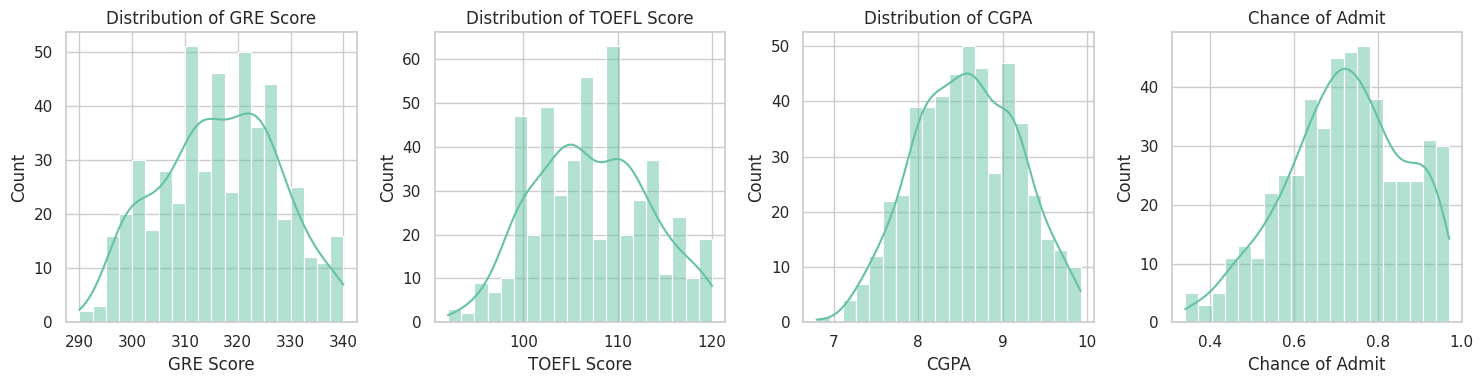

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(15, 4))
sns.histplot(df['GRE Score'], bins=20, kde=True, ax=axes[0])
axes[0].set_title("Distribution of GRE Score")
axes[0].set_xlabel("GRE Score")

sns.histplot(df['TOEFL Score'], bins=20, kde=True, ax=axes[1])
axes[1].set_title("Distribution of TOEFL Score")
axes[1].set_xlabel("TOEFL Score")

sns.histplot(df['CGPA'], bins=20, kde=True, ax=axes[2])
axes[2].set_title("Distribution of CGPA")
axes[2].set_xlabel("CGPA")

sns.histplot(df['Chance of Admit'], bins=20, kde=True, ax=axes[3])
axes[3].set_title("Chance of Admit")
axes[3].set_xlabel("Chance of Admit")
plt.tight_layout()
plt.show()


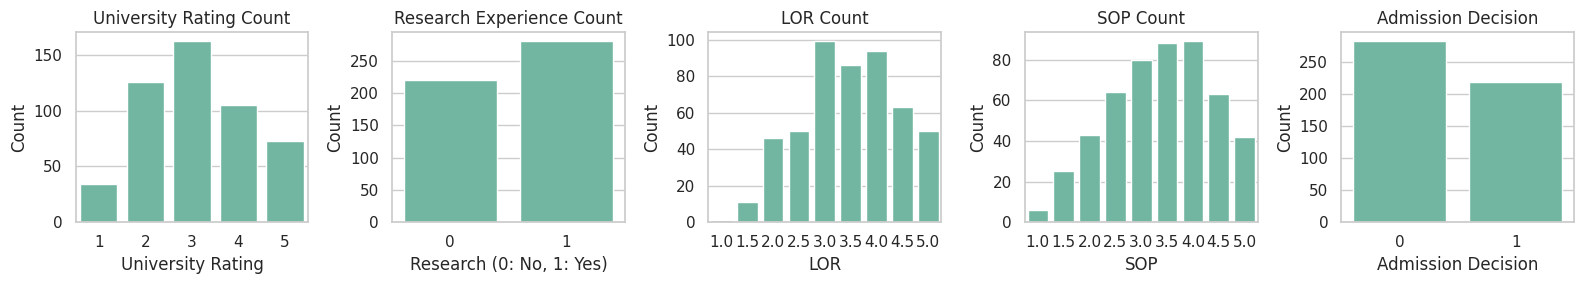

In [ ]:

fig, axes = plt.subplots(1, 5, figsize=(16, 3))
sns.countplot(x='University Rating', data=df, ax=axes[0])
axes[0].set_title("University Rating Count")
axes[0].set_xlabel("University Rating")
axes[0].set_ylabel("Count")

sns.countplot(x='Research', data=df, ax=axes[1])
axes[1].set_title("Research Experience Count")
axes[1].set_xlabel("Research (0: No, 1: Yes)")
axes[1].set_ylabel("Count")

sns.countplot(x='LOR', data=df, ax=axes[2])
axes[2].set_title("LOR Count")
axes[2].set_xlabel("LOR")
axes[2].set_ylabel("Count")

sns.countplot(x='SOP', data=df, ax=axes[3])
axes[3].set_title("SOP Count")
axes[3].set_xlabel("SOP")
axes[3].set_ylabel("Count")

sns.countplot(x='Admission Decision', data=df, ax=axes[4])
axes[4].set_title("Admission Decision")
axes[4].set_xlabel("Admission Decision")
axes[4].set_ylabel("Count")
plt.tight_layout()
plt.show()

##Observation 3:
##### The visualizations offer insights into the distributions of the numerical features and categorical counts.  

1.   ##### Data is distributed normally with some skewness in Tofel and GRE scores.
2.   ##### Ordinal data is also well distributed and we don't have a class imbalance issue.
3.  ##### No Values are missing in the dataset




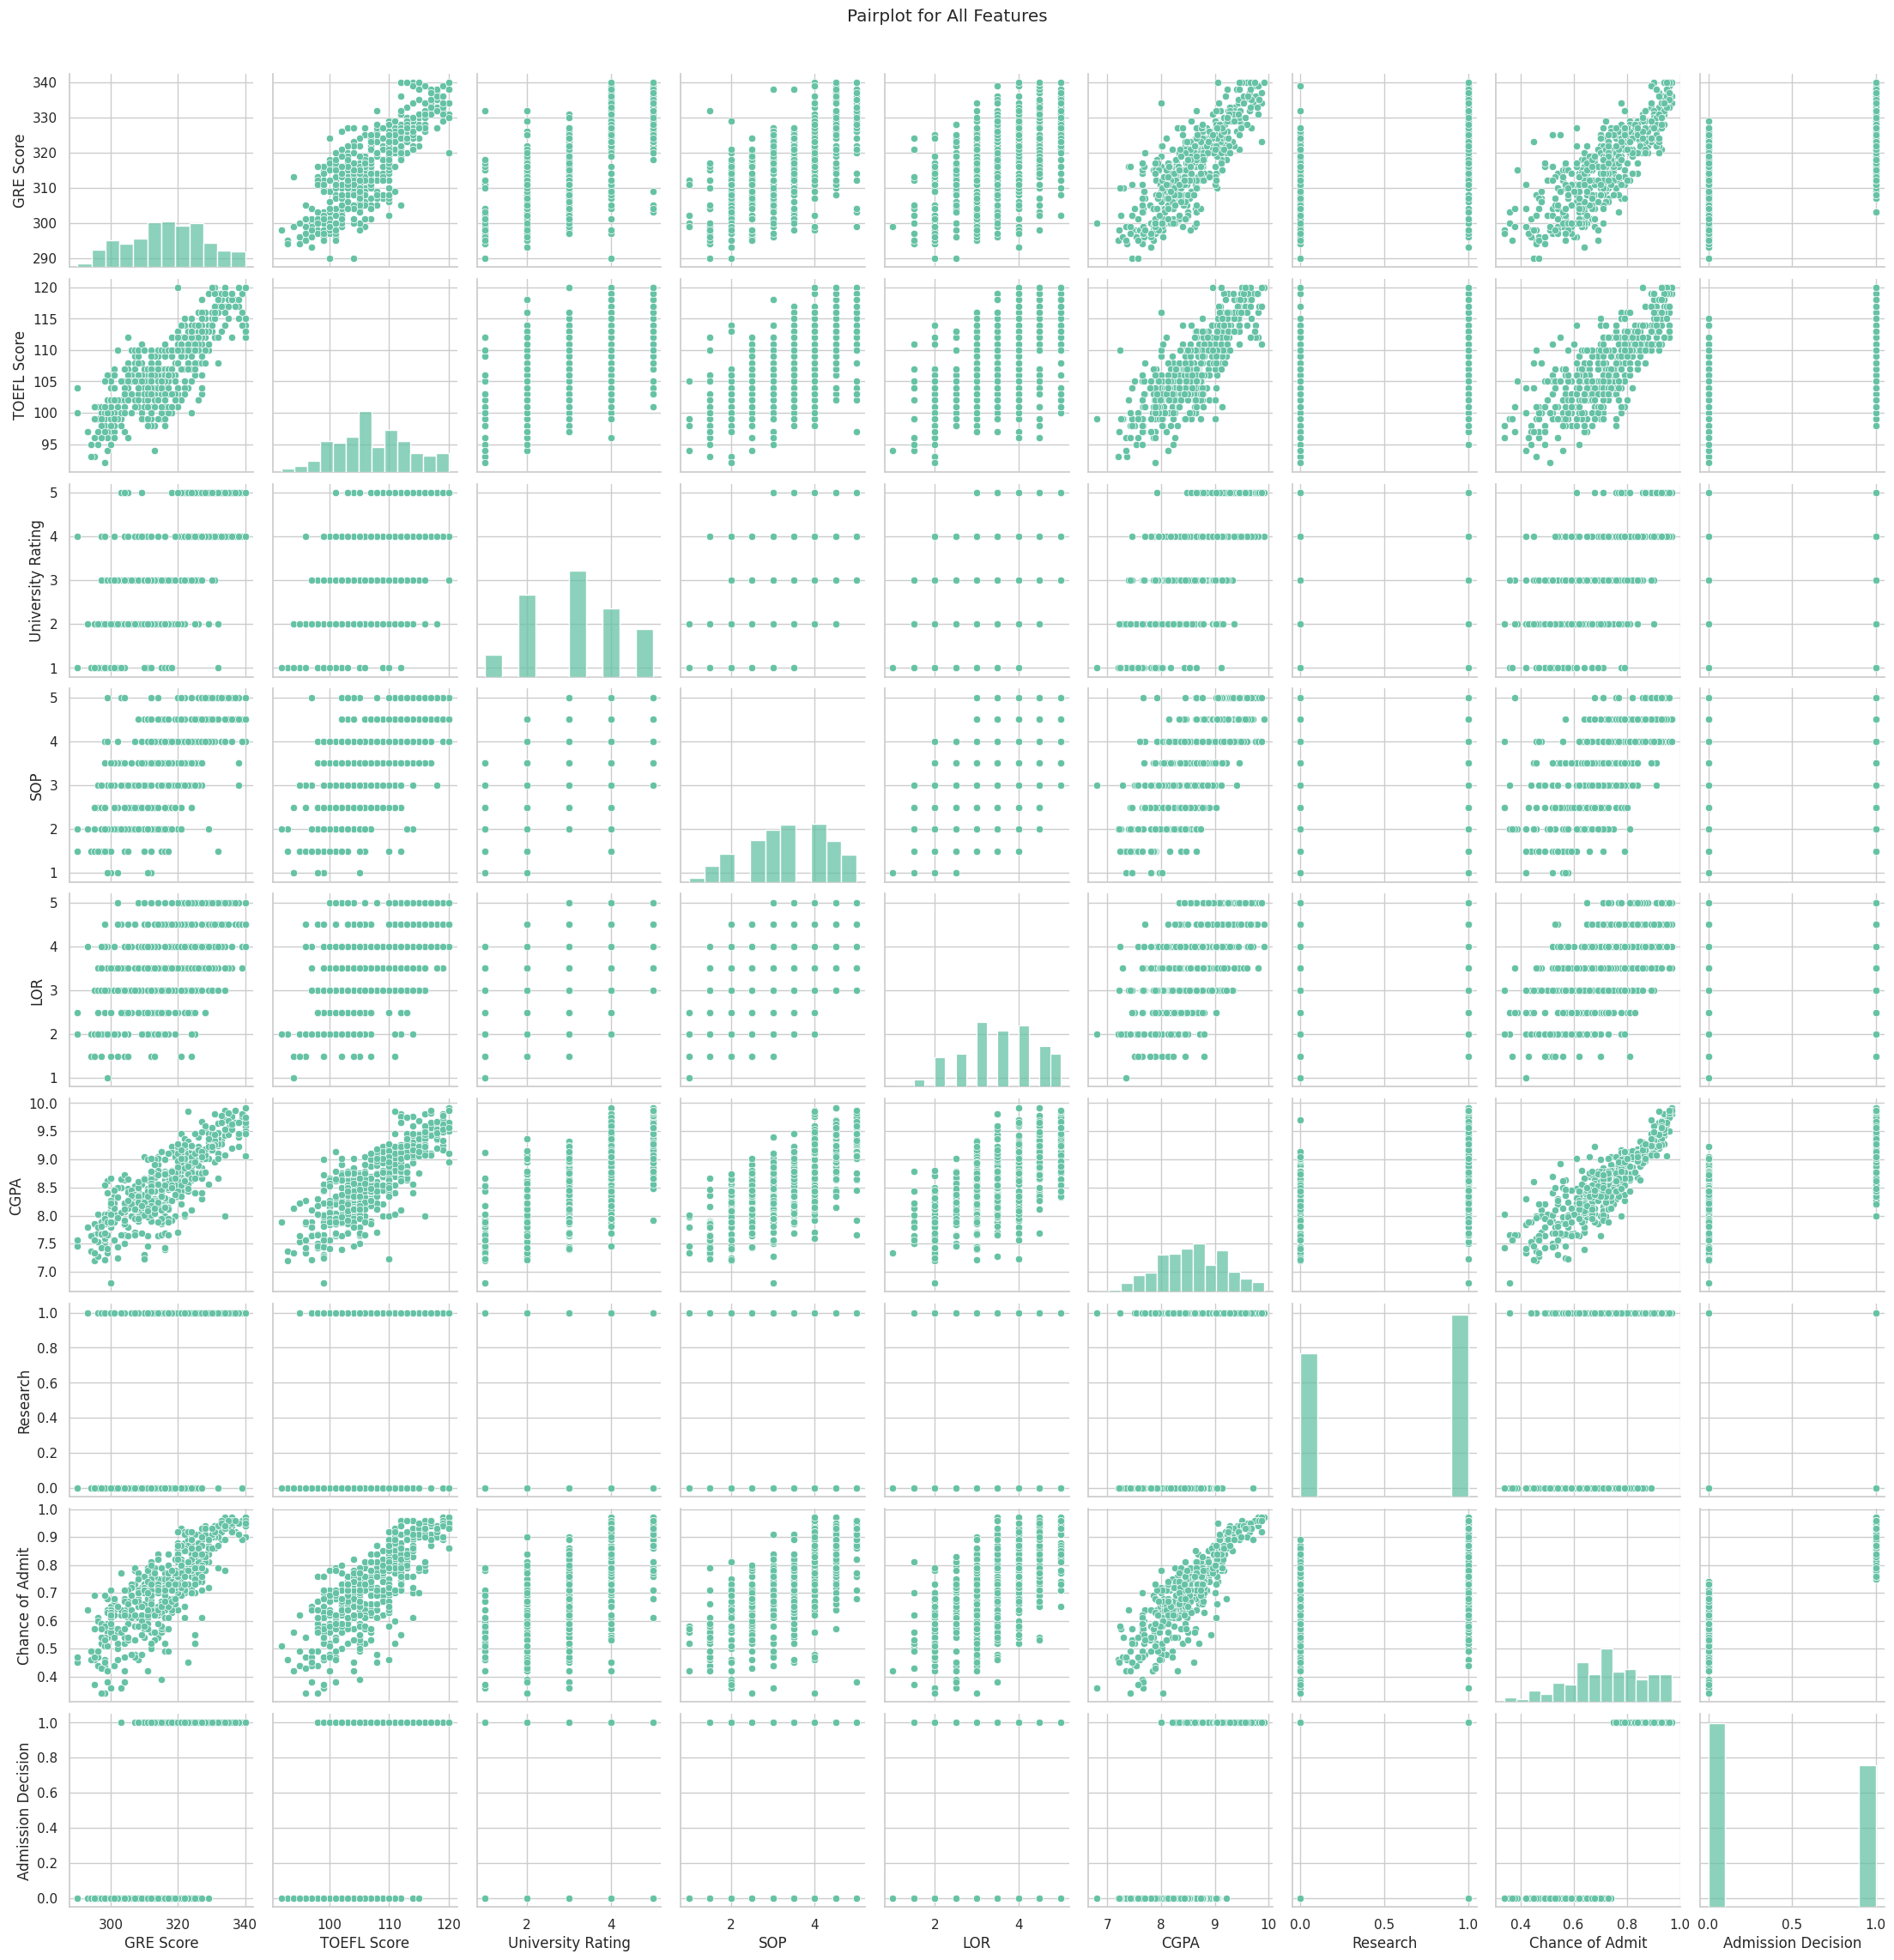

In [ ]:
sns.pairplot(df)
plt.suptitle("Pairplot for All Features", y=1.02)
plt.show()

## Observation 4:
##### The output displays features such as GRE Score, TOEFL Score, University Rating, SOP, LOR, CGPA, Research,  and the Chance of Admit.
##### There exist a direct correlation between numerical columns and Target Varibale.



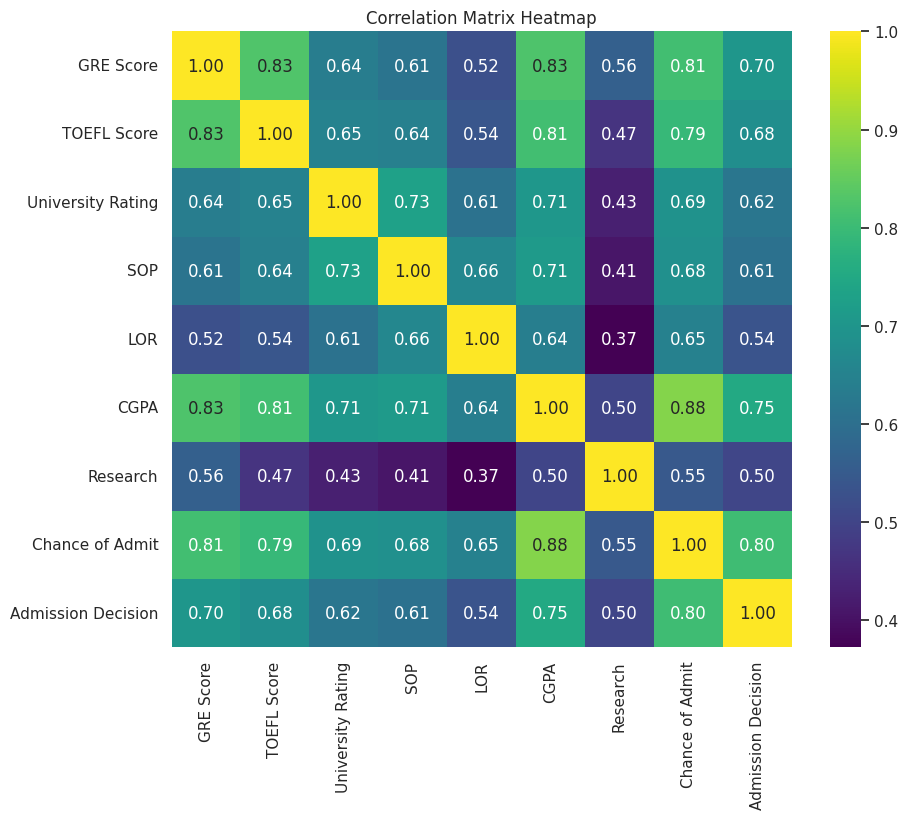

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()



## Observation 5:
##### The heatmap shows the correlations between numerical features. Fornstance, if GRE Score and TOEFL Score exhibit a high correlation, it could indicate redundancy.

### Impact on Feature Selection:
##### The correlational analysis is crucial for feature selection. The features have good correlation with Target variable.

# Step 3:	Data Pre-processing and cleaning
#####a.	Do the appropriate pre-processing of the data like identifying NULL or Missing Values if any, handling of outliers if present in the dataset, skewed data etc. Perform feature encoding. Mention the pre-processing steps performed in the markdown cell.
######b.	Apply appropriate feature engineering techniques (if applicable). Apply the feature transformation techniques like Standardization, Normalization, etc. You are free to apply the appropriate transformations depending upon the structure and the complexity of your dataset. Provide proper justification. Techniques used without justification will not be awarded marks. Explore a few techniques for identifying feature importance for your feature engineering task.


In [ ]:
print("Missing values count before processing:")
print(df.isnull().sum())

Missing values count before processing:
GRE Score             0
TOEFL Score           0
University Rating     0
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
Admission Decision    0
dtype: int64


##Observation 6
There is no null values in the dataset.

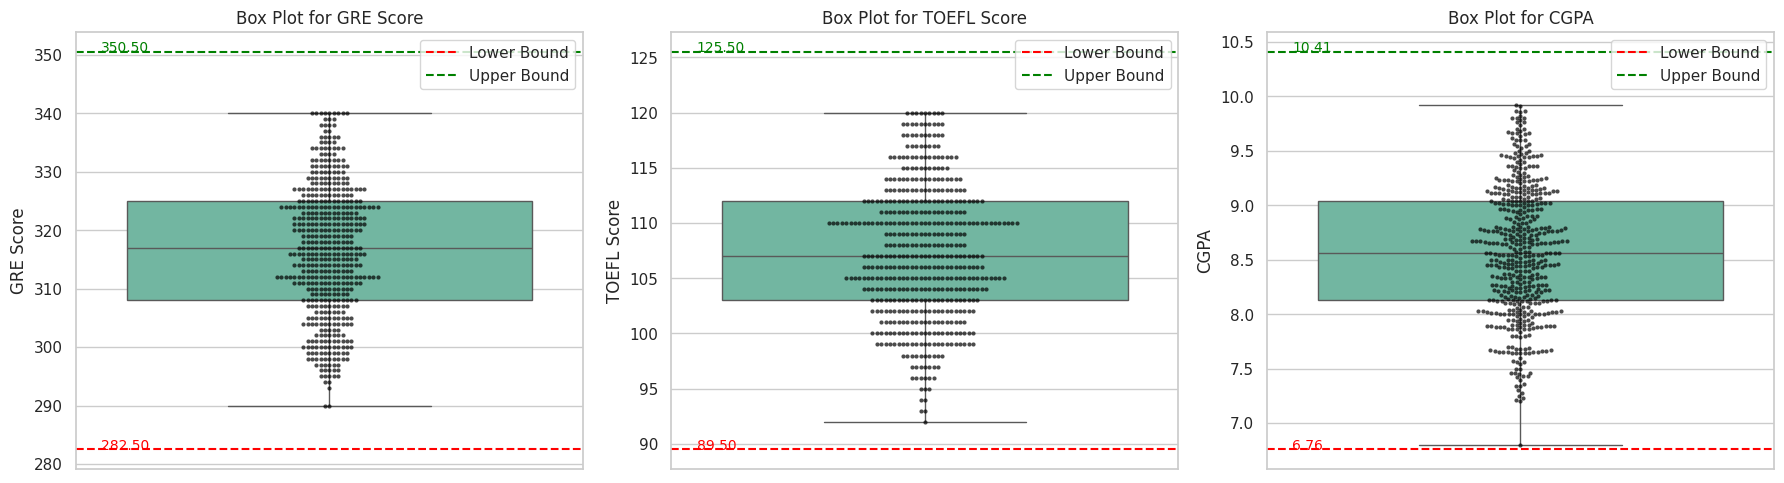

In [ ]:
#Outlier Detection
numerical_features = ['GRE Score', 'TOEFL Score', 'CGPA']

fig, axes = plt.subplots(1, len(numerical_features), figsize=(18, 5))

for ax, feature in zip(axes, numerical_features):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


    sns.boxplot(y=df[feature], ax=ax, showfliers=True)
    sns.swarmplot(y=df[feature], ax=ax, color='black', size=3, alpha=0.7)

    ax.axhline(lower_bound, color="red", linestyle="--", label="Lower Bound")
    ax.axhline(upper_bound, color="green", linestyle="--", label="Upper Bound")

    ax.text(0.05, lower_bound, f"{lower_bound:.2f}", color="red", fontsize=10, transform=ax.get_yaxis_transform())
    ax.text(0.05, upper_bound, f"{upper_bound:.2f}", color="green", fontsize=10, transform=ax.get_yaxis_transform())

    ax.set_title(f"Box Plot for {feature}")
    ax.set_ylabel(feature)
    ax.legend(loc="upper right")

plt.tight_layout()
plt.show()



##Observation 7:
#####The red dashed line indicates the lower bound and the green dashed line indicates the upper bound based on the IQR method.
##Justification:
##### No outliers are there. Also data is normally distributed so no need to remove outliers.

In [ ]:
print("\nSkewness of numerical features before transformation:")
print(df[numerical_features].skew())



Skewness of numerical features before transformation:
GRE Score     -0.039842
TOEFL Score    0.095601
CGPA          -0.026613
dtype: float64


##Observation 8:
There is no major skewness in the data.

In [ ]:
#Standarisatio/Nomalisation
scaler = StandardScaler()
features_to_scale = ['GRE Score', 'TOEFL Score', 'CGPA']
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

#df_encoded = pd.get_dummies(df, columns=['Research'], prefix='Research')
#Encoding is not impacting the model performace, no need to further complicate model.


##Justfication 9:
#####As our data is normally distributed, therefore i applied StandardScaler transformation.
#####For binary column one hot encoding is applied, but model performance don't got increased so removed.

#Step 3 B: Identify Feature Importance

In [ ]:
X = df.drop(columns={'Chance of Admit','Admission Decision'}, axis=1)
y = df['Admission Decision']

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X, y) # fitting entire data set without spliting for feature importance

importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

print("\nFeature importances from RandomForestClassfier:")
print(importances)


Feature importances from RandomForestClassfier:
CGPA                 0.697542
GRE Score            0.108495
TOEFL Score          0.066462
SOP                  0.047856
LOR                  0.043195
University Rating    0.021024
Research             0.015426
dtype: float64


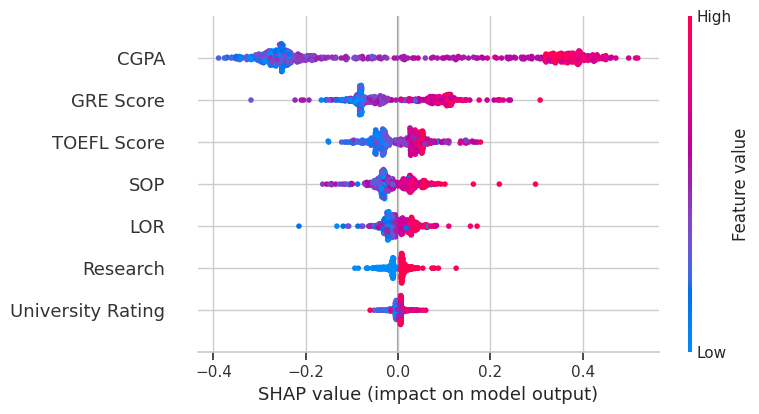

In [ ]:
import shap
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X)

if isinstance(shap_values, list):
    shap_values = shap_values[1]
shap.summary_plot(shap_values, X)


##Observation 9:
#####RandomForest is used to calcualte the importance of columns
#####SHAP values help us visualize the impact of each feature on the model output.
##CGPA have highest impact, followed by GRE and Tofel.
## Least impact is observed from University rating.


# Step 4: Model Building [5M]
#####a.	Split the dataset (KDDTrain+.txt) into training and test sets. Answer without justification will not be awarded marks. [1M]
#####i.	Train = 80 % Test = 20%
#####ii.	Also, try to split the dataset with different ratios of your choice.
#####b.	Build model using Logistic model and decision tree  [4 M]
#####i.	Tune hyperparameters (e.g., number of trees, maximum depth) using cross-validation. Justify your answer.

# Assignment 2 -Part1
#Implement predictive models/classifiers using the following classification approaches: [4]
* Logistic Regression
*	Decision tree
*	Ensemble Methods (any one of your choice)
*	K-Nearest Neighbour


In [ ]:
df['Admit_Class'] = df['Chance of Admit'].apply(lambda x: 1 if x >= 0.75 else 0)

X = df.drop(['Chance of Admit', 'Admit_Class','Admission Decision'], axis=1)
y = df['Admit_Class']

In [ ]:
X.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X_train_alt, X_test_alt, y_train_alt, y_test_alt = train_test_split(X, y, test_size=0.30, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV



#Logistic Regression
log_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # liblinear supports L1 penalty
}
log_reg = LogisticRegression(random_state=42, max_iter=1000)
grid_log = GridSearchCV(log_reg, log_param_grid, cv=5, scoring='accuracy')
grid_log.fit(X_train, y_train)
best_log = grid_log.best_estimator_
print("\nBest parameters for Logistic Regression:", grid_log.best_params_)
print("Best CV score for Logistic Regression:", grid_log.best_score_)

#Decision Tree Classifier
dt_param_grid = {
    'max_depth': [None, 3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}
dt_clf = DecisionTreeClassifier(random_state=42)
grid_dt = GridSearchCV(dt_clf, dt_param_grid, cv=5, scoring='accuracy')
grid_dt.fit(X_train, y_train)
best_dt = grid_dt.best_estimator_
print("\nBest parameters for Decision Tree:", grid_dt.best_params_)
print("Best CV score for Decision Tree:", grid_dt.best_score_)

#Ensemble Method: XGBoost Classifier
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0]
}
xgb_clf = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
grid_xgb = GridSearchCV(xgb_clf, xgb_param_grid, cv=5, scoring='accuracy')
grid_xgb.fit(X_train, y_train)
best_xgb = grid_xgb.best_estimator_
print("\nBest parameters for XGBoost:", grid_xgb.best_params_)
print("Best CV score for XGBoost:", grid_xgb.best_score_)

# K-Nearest Neighbors
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}
knn_clf = KNeighborsClassifier()
grid_knn = GridSearchCV(knn_clf, knn_param_grid, cv=5, scoring='accuracy')
grid_knn.fit(X_train, y_train)
best_knn = grid_knn.best_estimator_


Best parameters for Logistic Regression: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Best CV score for Logistic Regression: 0.8975

Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}
Best CV score for Decision Tree: 0.8699999999999999


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:39:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:39:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:39:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:39:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:39:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e


Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
Best CV score for XGBoost: 0.8825


In [ ]:
print("\nBest parameters for Logistic Regression:", grid_log.best_params_)
print("Best CV score for Logistic Regression:", grid_log.best_score_)
print("\nBest parameters for Decision Tree:", grid_dt.best_params_)
print("Best CV score for Decision Tree:", grid_dt.best_score_)
print("\nBest parameters for XGBoost:", grid_xgb.best_params_)
print("Best CV score for XGBoost:", grid_xgb.best_score_)
print("\nBest parameters for KNN:", grid_knn.best_params_)
print("Best CV score for KNN:", grid_knn.best_score_)


Best parameters for Logistic Regression: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Best CV score for Logistic Regression: 0.8975

Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}
Best CV score for Decision Tree: 0.8699999999999999

Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
Best CV score for XGBoost: 0.8825

Best parameters for KNN: {'n_neighbors': 5, 'weights': 'distance'}
Best CV score for KNN: 0.8675


# STEP 5: Performance Evaluation of All Models
#####a.	Compare the performance of the Logistic Regression and Decision Tree models using appropriate evaluation metrics.
#####b.	Provide insights into which model performs better and why. Answer without justification will not be awarded marks.


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

models = {
    'Logistic Regression': best_log,
    'Decision Tree': best_dt,
    'XGBoost': best_xgb,
    'KNN': best_knn
}

results = {}

for model_name, model in models.items():
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_prob)

    results[model_name] = {
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1,
        'AUC-ROC': roc
    }

from tabulate import tabulate
results_df = pd.DataFrame(results).T

print("\nComparison of Model Performance Metrics:")
print(tabulate(results_df, headers='keys', tablefmt='grid'))


Comparison of Model Performance Metrics:
+---------------------+------------+-------------+----------+------------+-----------+
|                     |   Accuracy |   Precision |   Recall |   F1-Score |   AUC-ROC |
+=====================+============+=============+==========+============+===========+
| Logistic Regression |       0.87 |    0.767442 | 0.916667 |   0.835443 |   0.94401 |
+---------------------+------------+-------------+----------+------------+-----------+
| Decision Tree       |       0.89 |    0.790698 | 0.944444 |   0.860759 |   0.94401 |
+---------------------+------------+-------------+----------+------------+-----------+
| XGBoost             |       0.88 |    0.785714 | 0.916667 |   0.846154 |   0.94401 |
+---------------------+------------+-------------+----------+------------+-----------+
| KNN                 |       0.89 |    0.820513 | 0.888889 |   0.853333 |   0.94401 |
+---------------------+------------+-------------+----------+------------+-----------+


#Assignment 2 - Part 2 : Model Comparision

Compare the performances of each model/classifier considering the given dataset using different evaluation measures such as Precision, Recall, F1-Score, AUC-ROC. Show the comparison chart in Python notebook.

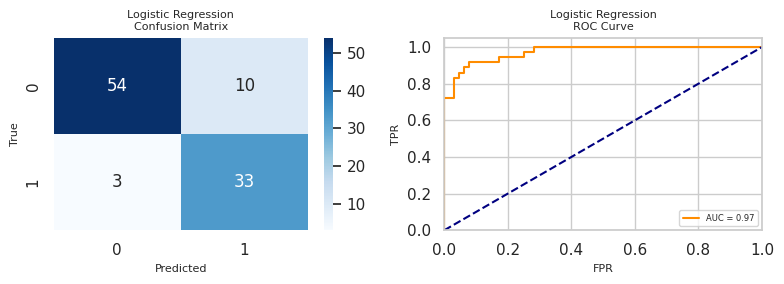

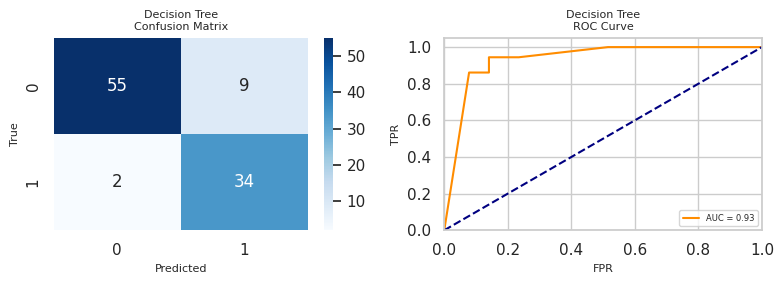

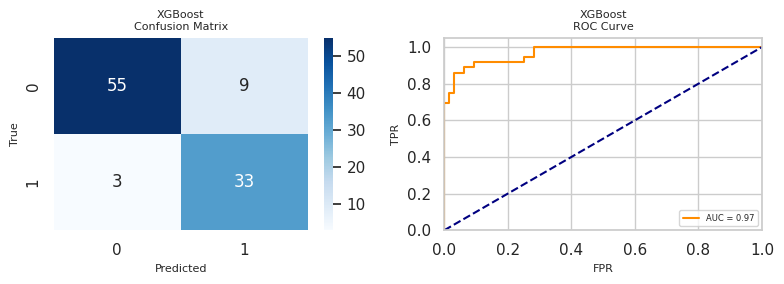

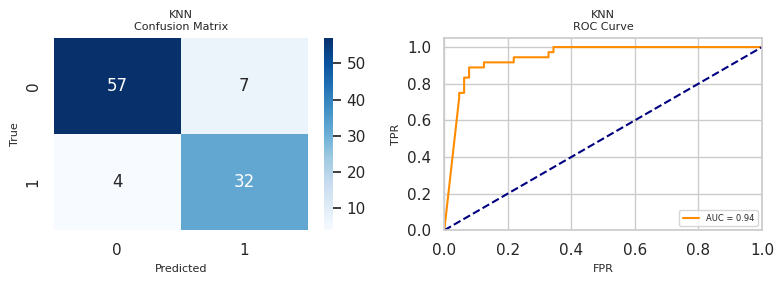

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc

for model_name, model in models.items():
    y_pred = model.predict(X_test)
    #ROC calculation
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    #confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    #C curve and AUC score
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 3))

    # Subplot 1: Confusion Matrix
    plt.subplot(1, 2, 1)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{model_name}\nConfusion Matrix", fontsize=8)
    plt.xlabel("Predicted", fontsize=8)
    plt.ylabel("True", fontsize=8)

    # Subplot 2: ROC Curve
    plt.subplot(1, 2, 2)
    plt.plot(fpr, tpr, color='darkorange', lw=1.5, label=f"AUC = {roc_auc:.2f}")
    plt.plot([0, 1], [0, 1], color='navy', lw=1.5, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("FPR", fontsize=8)
    plt.ylabel("TPR", fontsize=8)
    plt.title(f"{model_name}\nROC Curve", fontsize=8)
    plt.legend(loc="lower right", fontsize=6)

    plt.tight_layout()
    plt.show()


# Step 6 : Comparison of Model Performances



Comparison of Model Performance Metrics:
                     Accuracy  Precision    Recall  F1-Score  AUC-ROC
Logistic Regression      0.87   0.767442  0.916667  0.835443  0.94401
Decision Tree            0.89   0.790698  0.944444  0.860759  0.94401
XGBoost                  0.88   0.785714  0.916667  0.846154  0.94401
KNN                      0.89   0.820513  0.888889  0.853333  0.94401


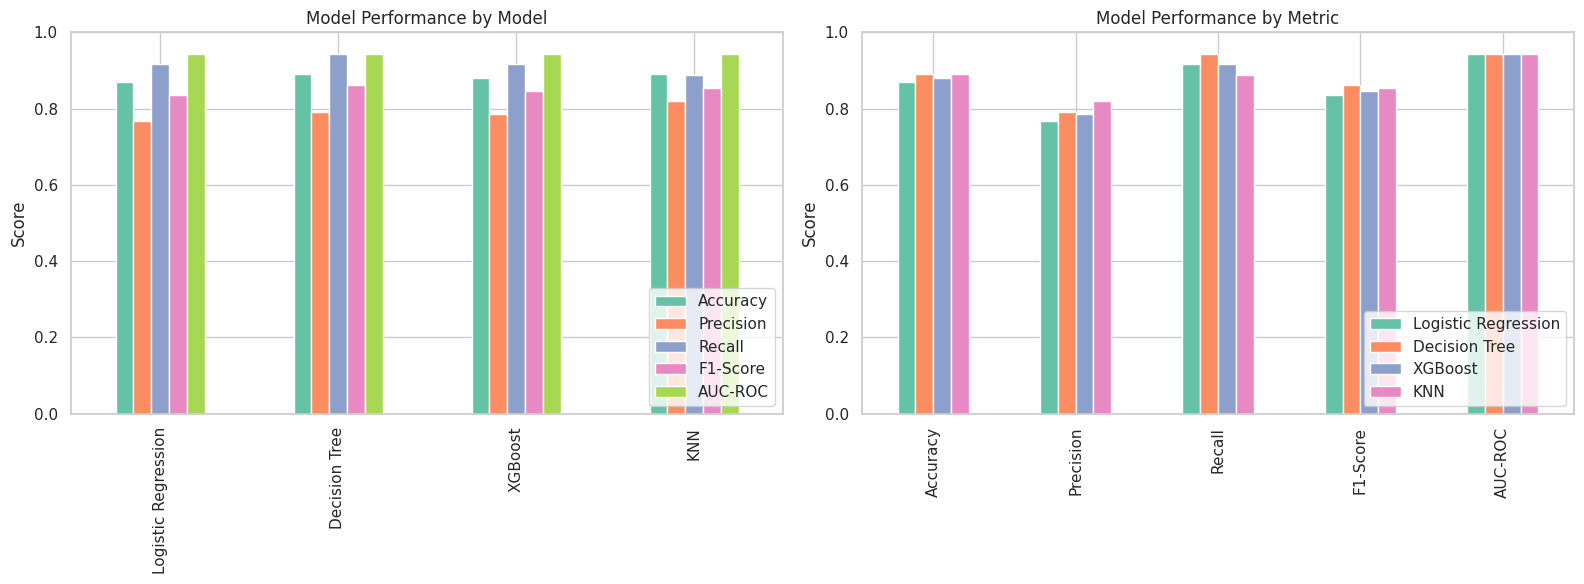

In [ ]:
sns.set_theme(style="whitegrid", palette="Set2")

results_df = pd.DataFrame(results).T
print("\nComparison of Model Performance Metrics:")
print(results_df)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Left Subplot: Grouped Bar Chart by Model
results_df.plot(kind='bar', ax=axes[0])
axes[0].set_title("Model Performance by Model")
axes[0].set_ylabel("Score")
axes[0].set_ylim(0, 1)
axes[0].legend(loc="lower right")

# Right Subplot: Transposed Bar Chart by Metric (e.g., all Accuracy scores together, etc.)
results_df.T.plot(kind='bar', ax=axes[1])
axes[1].set_title("Model Performance by Metric")
axes[1].set_ylabel("Score")
axes[1].set_ylim(0, 1)
axes[1].legend(loc="lower right")

plt.tight_layout()
plt.show()


#Final Conclusion:

* Based on Model comparision we can see that Accurracy is best observed on
 ##Decision Tree and KNN

* While F1 score is best for Decision Tree.
## Based on above matrices we can conclude best model for the given problem is Decision Tree.

####Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}
####Best CV score for Decision Tree: 0.8699999999999999



*   Accuracy   : 0.89
*   Precision  : 0.790698
*   Recall     : 0.944444
*   F1-Score   : 0.860759
*   AUC-ROC    : 0.94401




In [ ]:
# prompt: generate html output of this notebook

!jupyter nbconvert --to html 2024AB05302_Problem_Statement_11.ipynb


[NbConvertApp] WARNING | pattern '2024AB05302_Problem_Statement_11.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_ye